In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [12]:
cars = pd.read_csv("final_cars.csv")

In [13]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'length', 'width', 'curb-weight', 'engine-size', 'highway-mpg',
       'price'],
      dtype='object')

In [14]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [15]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,length,width,curb-weight,engine-size,highway-mpg
147,toyota,gas,two,hatchback,fwd,158.7,63.6,2040,92,38
77,mitsubishi,gas,two,hatchback,fwd,173.0,65.4,2370,110,30
171,toyota,gas,four,hatchback,fwd,175.6,66.5,2414,122,32
165,toyota,gas,two,hatchback,rwd,176.2,65.6,2551,146,30
76,mitsubishi,gas,two,hatchback,fwd,157.3,63.8,2145,98,30


In [16]:
X  = pd.get_dummies(X)

In [6]:
X.shape,y.shape

((201, 39), (201,))

In [7]:
X.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'highway-mpg',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

length                    -28
width                     481
curb-weight               5
engine-size               37
highway-mpg               -74
make_alfa-romero          -1800
make_audi                 1600
make_bmw                  8167
make_chevrolet            237
make_dodge                -2003
make_honda                -1355
make_isuzu                -4552
make_jaguar               6703
make_mazda                -1334
make_mercedes-benz        5972
make_mercury              -1539
make_mitsubishi           -2911
make_nissan               -1820
make_peugot               -3694
make_plymouth             -2497
make_porsche              11534
make_renault              -3549
make_saab                 42
make_subaru               -2542
make_toyota               -2697
make_volkswagen           -1682
make_volvo                -281
fuel-type_diesel          76
fuel-type_gas             -76
num-of-doors_four         -8
num-of-doors_two          8
body-style_convertible    2989
body-style_h

In [22]:
model.intercept_

-27296.852210292334

### Calculate accuracy with train data

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  3813305.296046502
RMSE :  1952.7686232747858


In [25]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [26]:
y_pred = model.predict(X_test)

In [27]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6304877.08
Root Mean Squared Error : 2510.95
Mean Absolute Error : 1668.38
R2 Score: 0.93


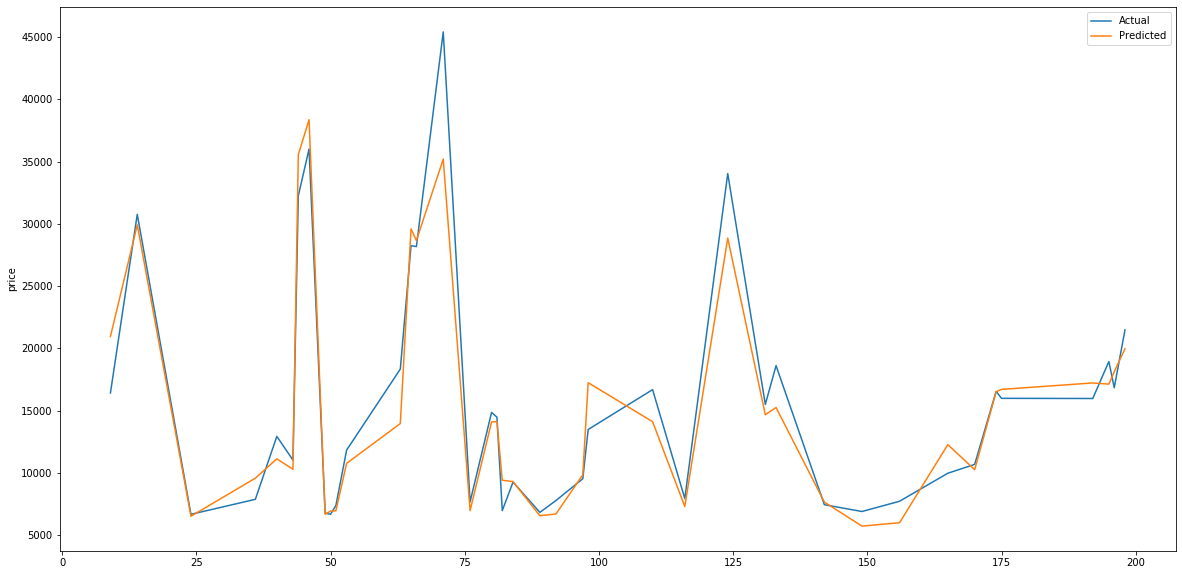

In [28]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [19]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

  6195  -    7799 -  -1604
  5942  -    6692 -   -750
 17092  -   15998 -   1094
 31085  -   28248 -   2837
 16738  -   15985 -    753
  7719  -    6795 -    924
 14265  -   14869 -   -604
 31731  -   28176 -   3555
  7520  -    7603 -    -83
 11519  -   11259 -    260


In [27]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

  6195  -    7799 -  -1604 - 20.56
  5942  -    6692 -   -750 - 11.21
 17092  -   15998 -   1094 -  6.84
 31085  -   28248 -   2837 - 10.04
 16738  -   15985 -    753 -  4.71
  7719  -    6795 -    924 - 13.60
 14265  -   14869 -   -604 -  4.06
 31731  -   28176 -   3555 - 12.62
  7520  -    7603 -    -83 -  1.10
 11519  -   11259 -    260 -  2.31


## Model with Standardization 

In [29]:
cars = pd.read_csv("final_cars.csv")

In [30]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [31]:
X = pd.get_dummies(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train,columns = X.columns)

In [37]:
X_test = pd.DataFrame(X_test,columns = X.columns)

In [38]:
X_test.head()

,length,width,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.081138,2.994086,2.413275,4.982797,-2.238975,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.306820,-0.956277,-1.071322,-0.923353,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-0.538667,-0.763576,-1.150058,-0.895755,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.811665,0.922554,0.921319,1.312152,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,-1.148408,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.005003,-0.281825,-0.439410,-0.095388,0.425590,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = model.predict(X_test)

In [41]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6304877.08
Root Mean Squared Error : 2510.95
Mean Absolute Error : 1668.38
R2 Score: 0.93


### Micro model with 2 features 

In [42]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [43]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [45]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820935

In [48]:
y_micro_pred = micro_model.predict(X_micro_test)

In [49]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.79


## RandomForestRegressor 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9869475209985776


In [26]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.91


In [27]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6257180.3761794465
RMSE :  2501.4356630102334


In [28]:
for f,v in zip (X_train.columns, model.feature_importances_):
      print(f"{f:30} {v:0.2f}")

length                         0.02
width                          0.02
curb-weight                    0.27
engine-size                    0.55
horsepower                     0.04
city-mpg                       0.08
fuel-type_diesel               0.00
fuel-type_gas                  0.00
num-of-doors_four              0.00
num-of-doors_two               0.00
body-style_convertible         0.00
body-style_hardtop             0.00
body-style_hatchback           0.00
body-style_sedan               0.00
body-style_wagon               0.00
drive-wheels_4wd               0.00
drive-wheels_fwd               0.00
drive-wheels_rwd               0.00


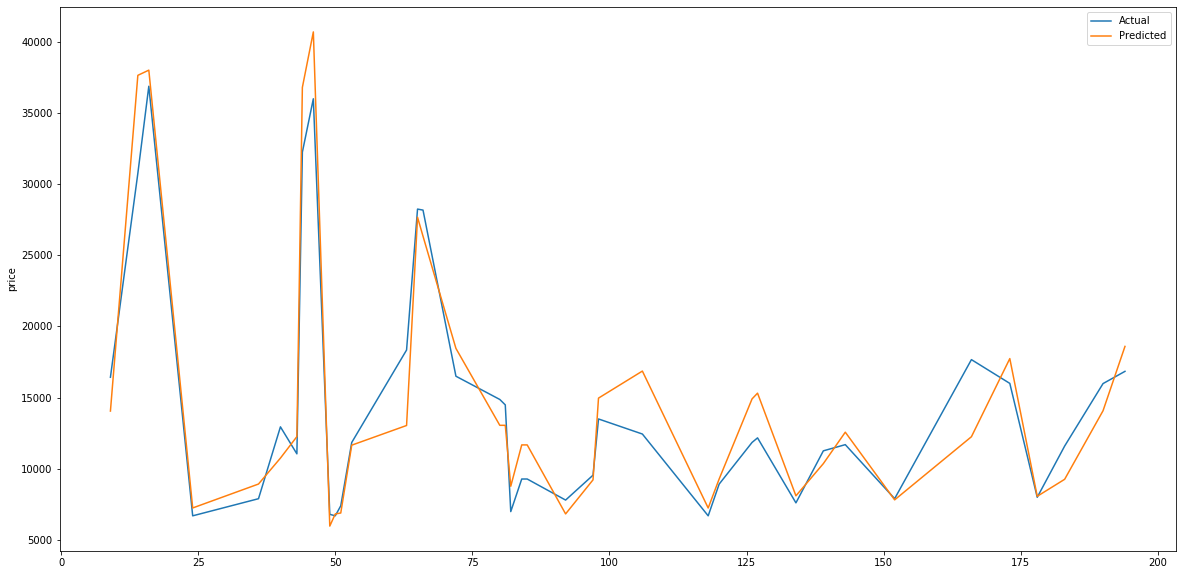

In [29]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [47]:
from sklearn.linear_model import SGDRegressor

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = SGDRegressor(random_state=100, penalty="l1")
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9400729944836433


In [52]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.92


In [53]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5109246.434989209
RMSE :  2260.364226178872
